## **supervised machine learning**
**Supervised Machine Learning** involves helping an algorithm, called a **model**, learn to make **predictions**, based on data it has been "trained on".
- Making a prediction entails providing an output, called a **prediction**, based on various inputs called **features**.
- The correct predicton is called the **target**, since the purpose and goal of the model is to hit the target with a correct prediction.
- During training the "correct answer" is called the **label**, since it is provided information.
- Training a model entails providing the model with **training data**, that is "inputs paired with the correct label".
- The "questions" are input variables, known as **features**
- During training the model is provided the "correct answer" (target output) that goes with each input feature.

**training scenario**
  - if a model is being trained to predict car prices based on certain known features of the car, the **features** (fuel efficiency, engine size, horsepower, etc.) would be a 2D array of numeric values, one array per car, and the corresponding **label** (correct answers) would be the **price** of the car. The model would be given a lot of feature sets with correct answers in the hopes that it could learn to then predict prices based on just features (without being given the answers).

  - if a model is being trained to recognize pictures of dogs vs. cats, the **features** would be images of dogs or cats, and the **labels** (correct answers) would be **cat** or **dog**. If the model "sees" enough pictures of dogs vs. cats, it can eventually recognize enough unique features to distinguish between the two.

**the model only "thinks" in numbers**.
- All inputs to a model for machine leaning training need to be numbers. So a "color photo" of a cat would actually be an array of pixel data, as R,G,B values.
- All outputs (predictions) made by a model are numbers, as well.  Again, in the case of  cat-vs.dog, the model's predictions would be one of two numbers, such as 1 for "cat" and 2 for "dog".

**testing data**.  
- Some of the data needs to be withheld from the model during training, so that the model can be tested later. This "withheld" data is known as **testing data**
- **train_test_split()** is a scikit learn method for taking a dataset and dividing it up into training and testing sets, each with two parts: "features" and "labels".
- **train_test_split()
involves splitting a dataset into **training** and testing sets
- 80% of the data is (typically) used during training
- 20% of the data is (typically) reserved for testing


**Predicting Car Sales using LinearRegression Machine Learning model**
- working with **SciKit Learn (sklearn)** machine learning libaries
- **train_test_split()** method divides data into training and testing
- **df.corr(numeric=True)** returns a new df of numeric values
  - new df shape has equal number of rows and cols
  - values are correlations between row-col pairings
  - self-pairs have a correlation value of 1
- **sns.heatmap()** is a visualization of a correlation matrix as color-coded boxes
- **sns.pairplot(df)** is a visualization of a correlation matrix as bar charts comparing columns

In [71]:
# install seaborn if necessary
%pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns # plotting library
import pprint as pp

In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# install sklearn (Sci-Kit Learn)
%pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
# import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import StandardScaler so we can standardize all the data (make all the mean values 0)
from sklearn.preprocessing import StandardScaler

In [76]:
# Load up a different dataset with more rows, so better for ML training
# the one we want is conveniently built in to sklearn
from sklearn.datasets import fetch_california_housing

In [77]:
# load the California housing data into dataframe
ca_df = fetch_california_housing(as_frame=True).frame

In [78]:
print(type(ca_df)) # <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [79]:
# get shape of housing_df and print first 5 rows:
print(ca_df.shape) # (20640, 9)
ca_df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [80]:
# get the cols into a list
cols_list = list(ca_df.columns)
pp.pprint(cols_list)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']


In [81]:
# check for missing data
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Correlation Matrix** is a **DataFrame** made from numeric variables, where every value is compared to every other value.
- The dataframe contains all columns with one row per column.
- **index** (row names) equal column names -- not integers
- values are floats, ranging from **-1** to **1**.
- **positive** number means positive correlation
- **1.0** (the max) indicates a "self-comparison"
- **negative** number means negative correlation
- **California housing** has 9 columns, so its correlation matrix is a 9x9 grid.
- 1.0000 "self-comparisons" run diagonally, from upper left

**df.corr(numeric_only=True)** method called on a dataframe returns a correlation matrix, also as a df



In [82]:
# make a correlation matrix dataframe from the 9-column df:
corr_df = ca_df.corr()

In [83]:
# Output the shape and datatype, along with the matrix df itself:
print(corr_df.shape) # (9,9)
corr_df


(9, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


A **Heat Map** is a a color-coded correlation matrix.
- **seaborn** is the package of choice for making heat maps
- positive correlations are shades of orange and tan
- the max 1 (self-correlation) is a beige color
- negative correlations are shades of red and purple
- high negative correlations tend toward black

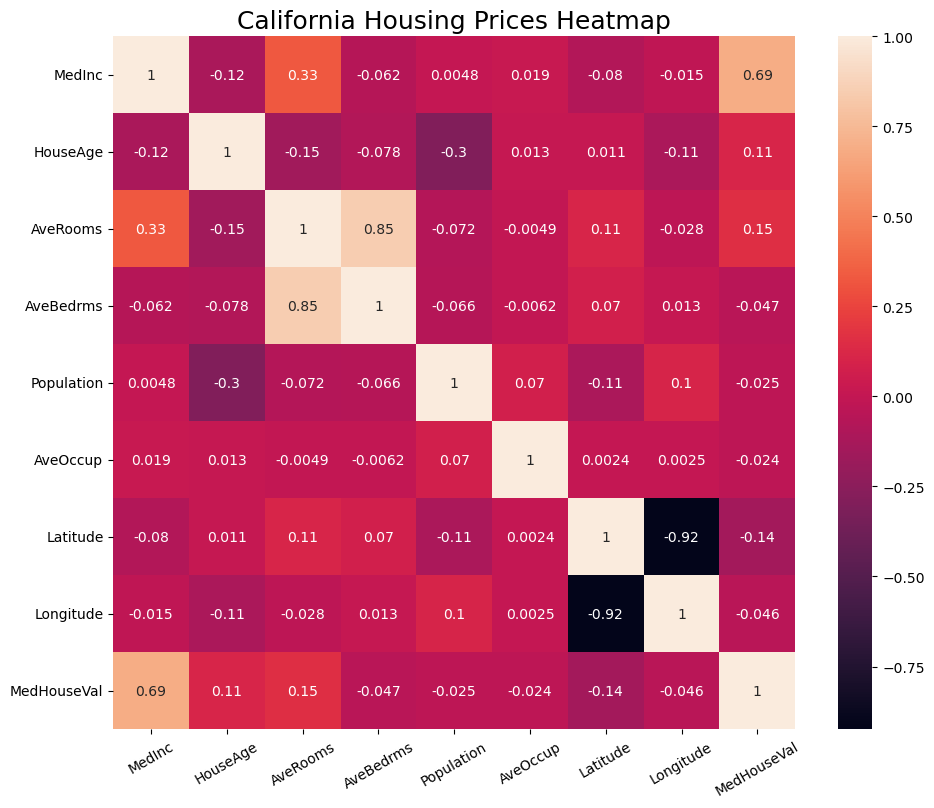

In [84]:
# Make a seaborn heat map from the 9x9 df correlation matrix
# a heatmap uses colors to show positive / negative correlation between pairs
# the maximum positive correlation is 1
# the maximum negative correlation is -1
# a value near 0 shows little to no correlation
# a "self-pair" with a correlation of 1 is by default beige
plt.figure(figsize=(11,9))
# a perfect negative corrleation of -1 is black
# at around -0.7 the negative correlation color is already black
sns.heatmap(corr_df, annot=True, annot_kws={'size':10})
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10, rotation=0)
plt.title("California Housing Prices Heatmap",fontsize=18)
# save the heatmap as a .png

plt.savefig("../images/california-housing-prices-heatmap.png")
plt.show()

A **Pair Plot** is a a correlation matrix of scatter plots
- **seaborn** is the package of choice for making pair plots
- strong positive correlations show as dots trending upward from left the right
- strong negative correlations show as dots trending downward from left to right
- self-correlations are **histograms**, which show data in frequency distribution **bins** (bars)

In [85]:
# make a df of just 6 selected columns
print(ca_df.columns)
ca_6col_df = ca_df.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'MedHouseVal']]
ca_6col_df.head()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,37.85,-122.25,3.422


In [86]:
# make a correlation matrix from the 6-col df:
corr_6col_df = ca_6col_df.corr()
corr_6col_df

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.106389,-0.027540,0.151948
Latitude,-0.079809,0.011173,0.106389,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.144160,-0.045967,1.000000


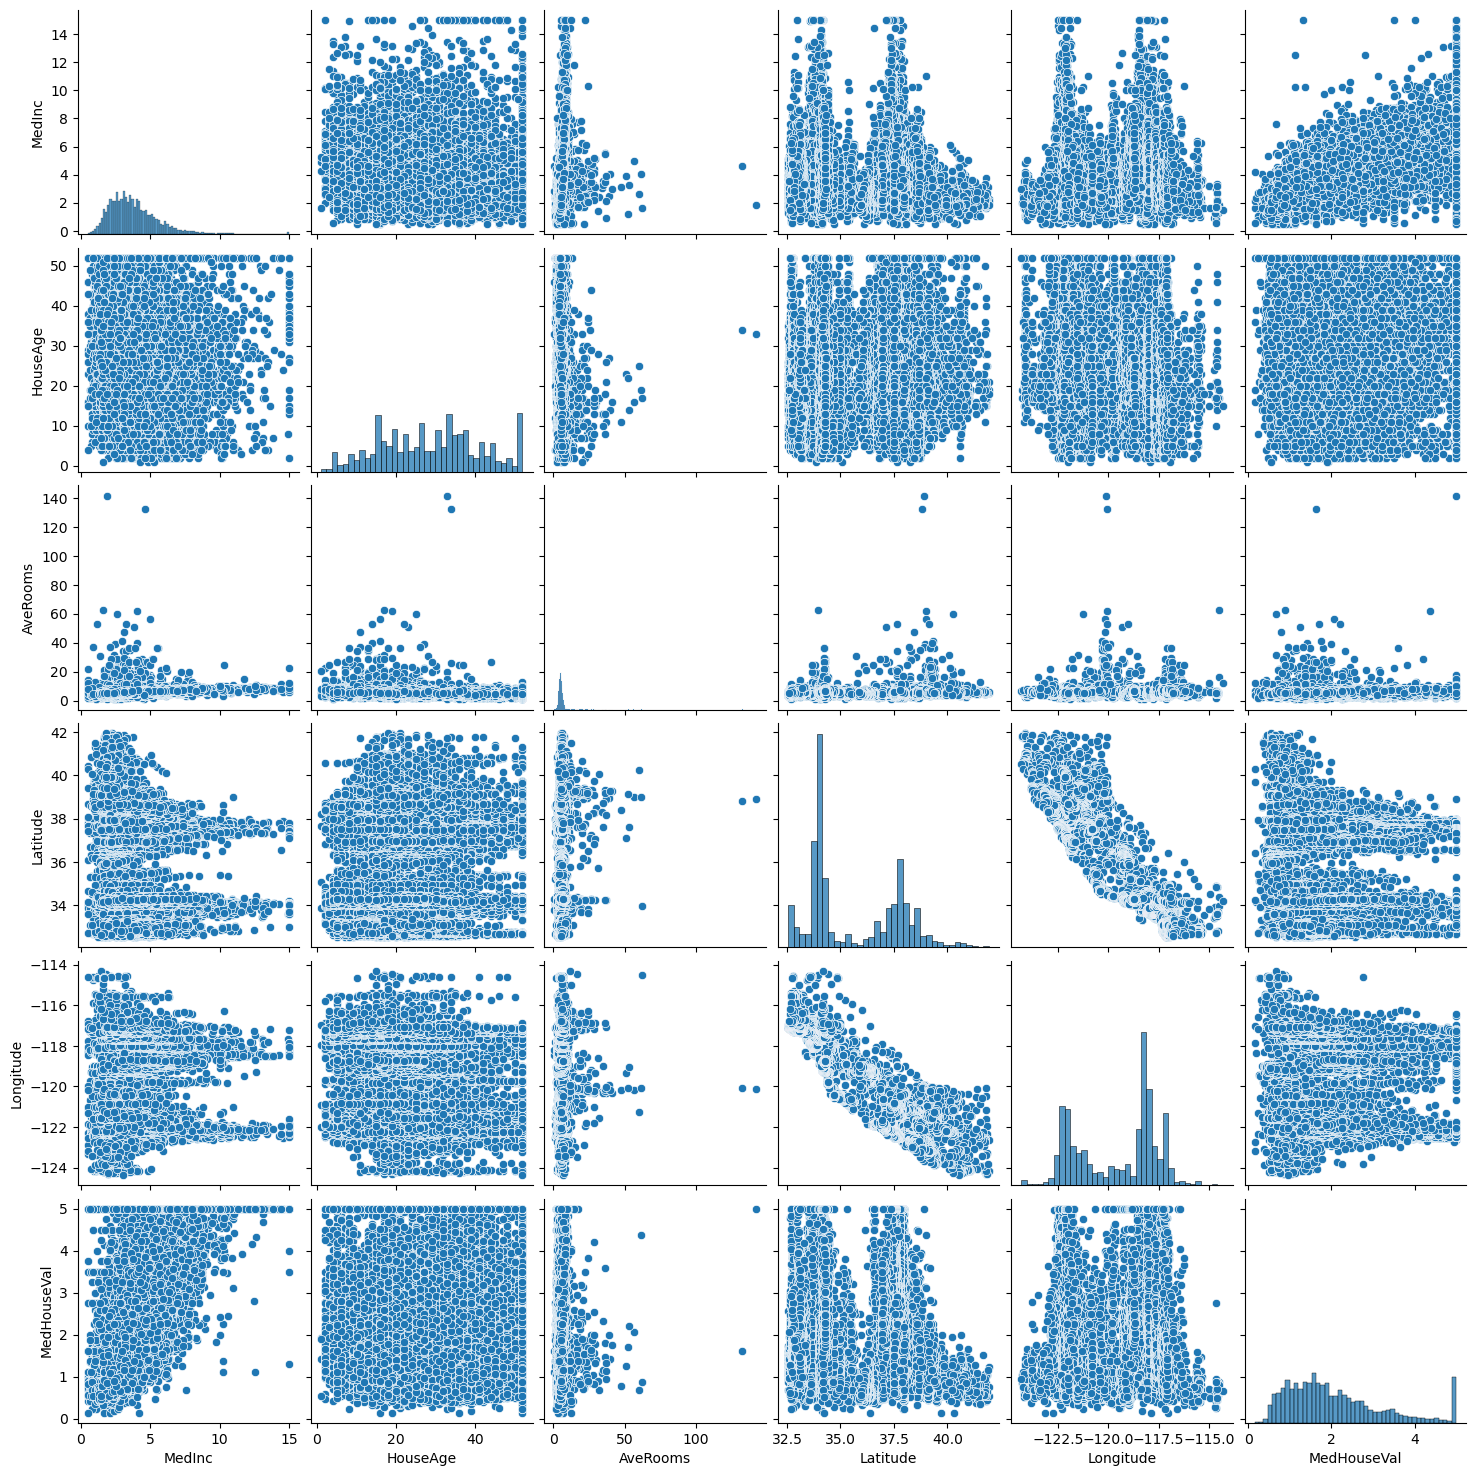

In [87]:
# Make a seaborn pairplot from the 6 col df of selected features
sns.pairplot(ca_6col_df)
# understanding the visualizations of the data:
# scatter plot showing trending up to the right
# indicates a strong positive correlation,
# such as engine size to horsepower
# scatter plot showing trending down to the right
# indicates a strong negative correlation,
# such as engine size to fuel efficiency
# self-pair histograms show frequency distribution
plt.show()

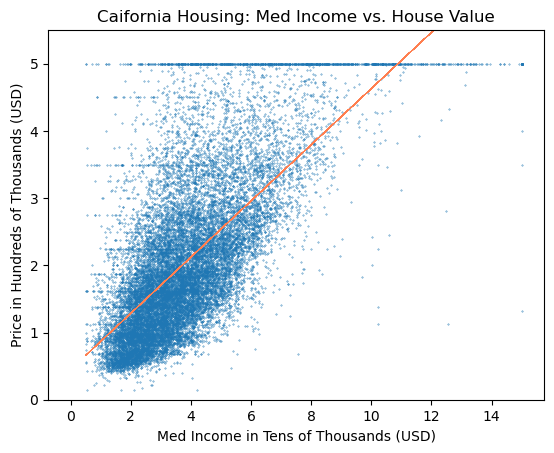

In [88]:
# make a scatterplot of just MedHouseVal vs MedInc
# this is the pair with the 0.68 (very high) Pos Correlation
# this will show a diag up to the right, through which we
# can draw a regression line
x = np.array(ca_df['MedInc'])
y = np.array(ca_df['MedHouseVal'])
plt.scatter(x,y,s=0.1)
plt.title("Caifornia Housing: Med Income vs. House Value")
plt.xlabel("Med Income in Tens of Thousands (USD)")
plt.ylabel("Price in Hundreds of Thousands (USD)")
plt.ylim(0,5.5)
# plot regression line through the dots
m, b = np.polyfit(x, y,1)
plt.plot(x, m*x+b, 1, color='coral', lw=0.5)
plt.show()


**training a linear regression machine learning model**

Using our **California housing prices**, we will train a model to
- **predict california housing prices** based on 6 **independent variables**.  

these independent variables will be "fed" to the model along with the corresponding price of the house
  - median income (MedInc)
  - latitude (Latitude)
  - longitude (Longitude)
  - average number of rooms (AveRooms)
  - house age (HouseAge)
  - average occupancy / number of people living there (AveOccup)
- Save those 4 columns to a new df, called **X**
- 'Longitude' by itself correlates poorly to price (0.046) BUT likely synergizes w 'Latitude' so the two should BOTH be included
- Save just the MedHouseVal -- the value we want to predict -- as **y**
- y is a vector of "answers" / labels; the are dependent variable
- since this is just one column, it is a 1D vector, called a **Pandas Series**

In [89]:
# take out all the rows where the price is pinned at the max 500+
# ca_df = ca_df[ ca_df['MedHouseVal'] <= 4.999]
# print(ca_df.shape) # 1000 rows GONE
# That backfired (score went down from 0.64 to 0.60) so put back the rows

In [90]:
# make a df of the 6 independent variables which will be used to train the model
# the goal is the model detects patterns in the 6 variables that help it to predict
# 'Longitude' by itself correlates poorly to price (0.046) BUT likely synergizes w 'Latitude' so the two should BOTH be included
X = ca_df.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']]
X.head() # first 5 rows
# ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
    #    'Latitude', 'Longitude', 

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25


In [91]:
# Feature Engineering: Make a NEW column
# ONE engineered feature: "RoomsPerPerson"
# replace any occurrence of 0 with 1 so that we never divide by 0 which would give us NaN which we cannot feed to an ML model
X["RoomsPerPerson"] = X["AveRooms"] / X["AveOccup"].replace(0, 1)
X["BdrmsPerPerson"] =   X['AveBedrms'] / X["AveOccup"].replace(0, 1)

In [92]:
# Now that we have the super-powered combo ratio "RoomsPerPerson", we can reduce noise and get lean by dropping the cols it came from:
# X.drop(columns=["AveRooms","AveOccup"],inplace=True)
# dropping these cols backfired, so put them back!!

In [93]:
# Output the X df's shape, number of dimensions, data type, and first 5 rows
print(X.shape) # (20640, 4) 2D DataFrame matrix

(20640, 9)


In [94]:
# y is the output / label / prediction / "answer"
y = ca_df.loc[:,'MedHouseVal']

In [95]:
# Output the y vector's shape, data type and first 5 values
print(y.shape, type(y)) # (20640,) 1D Series vector
print(y[:5])

(20640,) <class 'pandas.core.series.Series'>
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


Supervised Machine Learning involves training an ML Model to recognize patterns in data in such a way that it can make predictions when it sees new data. The training process involves providing the model with inputs and correct answers. After seeing enough correct input-answer sets, the model may be able to then predict with some degree of reliability a future answer from just the inputs.

- **features** are the inputs to the model (**X**). Each **X** could consist of just one variable, or it could contain several (or many).

- **target** is the "answer" the model is trained on and will be trying to predict (**y**)  

- **X_train** is the conventional name given to the set of features set aside for training the model, this is typically 80% of the data  

- **y_train** is the conventional name given to the set of targets / "answers" set aside for training the model, this is typically 80% of the data

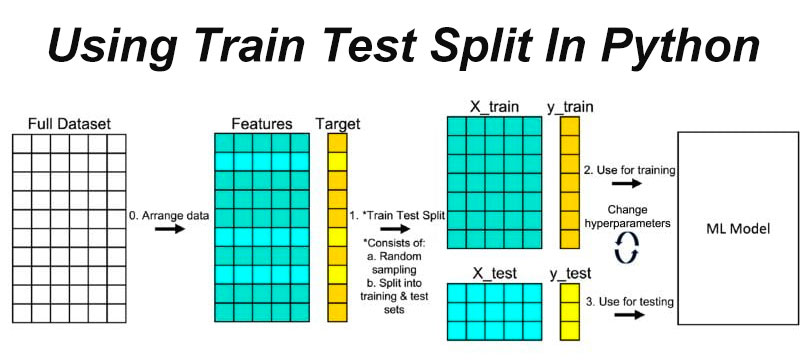

In [96]:
# output the train-test-split jpg 
Image("../images/train-test-split.jpg")

- **train_test_split(X,y,test_size)** method takes 3 inputs: X, y and test_size
- **test_size** is the percent of data that you want to hold in reserve for later testing.
- the model will not see testing data during training;
- the test_size is typically 20%, so .2
- **train_test_split()** method returns 4 arrays of data:
  - **X_train**, a dataframe of X input features for *training* the model; consists of 80% of the data
  - **X_test**, a dataframe the X input features for *testing* the model, consists of 20% of the data
  - **y_train**, a vector of y input labels for training; consists of 80% of the data
  - **y_test**, a vector of y input labels for testing; consists of 20% of the data

In [97]:
# Pass X (features) and y (labels / "correct answers") to the train_test_split method.
# The method returns 4 arrays, so set the call equal to 4 variables, separated by commas
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
# The order does matter. The method returns:
# X_train as a dataframe,
# X_test as a dataframe
# y_train as a vector
# y_test as a vector
# Add a third argument test_size to specify the percent of data to be used for testing


In [98]:
# Output the X_train dataframe
# this is the data the model will be tested on
# it will be shown these inputs and asked to predict price
# The "prices" -- is not here, as that is the y data
print(X_train.shape) # (16512, 4) the df of 80% of rows, 3 cols only, data shuffled
print(type(X_train)) # <class 'pandas.core.frame.DataFrame'>
X_train.head()
# L@@K: the rows are not in order because random 80% was selected for training

(16512, 9)
<class 'pandas.core.frame.DataFrame'>


,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,RoomsPerPerson,BdrmsPerPerson
14196,3.2596,33.0,5.017657,1.006421,3.691814,32.71,-117.03,1.359130,0.272609
8267,3.8125,49.0,4.473545,1.041005,1.738095,33.77,-118.16,2.573820,0.598935
17445,4.1563,4.0,5.645833,0.985119,2.723214,34.66,-120.48,2.073224,0.361749
14265,1.9425,36.0,4.002817,1.033803,3.994366,32.69,-117.11,1.002116,0.258815
2271,3.5542,43.0,6.268421,1.134211,2.300000,36.78,-119.80,2.725400,0.493135


In [99]:
# get the mean age of house
mean_age = ca_df["HouseAge"].mean()
print(mean_age)

28.639486434108527


In [100]:
# Output the y_train vector
# this data consists of the labels ("correct answers"), provided during training
# the model will be shown these labels so that it can learn how they relate to the inputs
# the model will figure out a relationship between X and y, and with that can predict prices
print(y_train.shape) # (16512,) the vector of 80% of "answers" / labels shuffled in sync with X
print(y[:5])

(16512,)
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [101]:
# output the first 5 X_test rows from the dataframe
# these are the inputs / features to be used for testing the model
# testing involves having the model predict prices to go with
# the X_test inputs
# accuracy is a measure of how closely the model predicts
# the actual prices of the test set
print(X_test.shape) # (4128, 4)
X_test.head()

(4128, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,RoomsPerPerson,BdrmsPerPerson
20046,1.6812,25.0,4.192201,1.022284,3.877437,36.06,-119.01,1.081178,0.263649
3024,2.5313,30.0,5.039384,1.193493,2.679795,35.14,-119.46,1.880511,0.445367
15663,3.4801,52.0,3.977155,1.185877,1.360332,37.80,-122.44,2.923664,0.871756
20484,5.7376,17.0,6.163636,1.020202,3.444444,34.28,-118.72,1.789443,0.296188
9814,3.7250,34.0,5.492991,1.028037,2.483645,36.62,-121.93,2.211665,0.413923


In [102]:
# output the first 5 y_test values from the 1D vector
# these are "correct labels" that correspond to the X_test inputs
print(y_test.shape) # (4128,)
print(y_test[:5])

(4128,)
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


- **standard_scaler.fit_transform(X_train)** standardizes the input numbers
  - the mean of each column becomes 0
  - the other values are all standard deviations

In [103]:
# instantiate the StandardScaler
scaler = StandardScaler()

In [104]:
# make a standard scaler version of X_train
# so in addition to setting the mean to 0
# and all other values to standard deviations from the mean
# fit_transform also strips the DataFrame down to a 2D numpy array
X_train_sc = scaler.fit_transform(X_train)

In [105]:
print(X_train_sc.shape) # (16512, 4)
print(type(X_train_sc), X_train_sc.ndim)
X_train_sc[:5]

(16512, 9)
<class 'numpy.ndarray'> 2


array([[-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.05137609,
        -1.3728112 ,  1.27258656, -0.55201735, -0.56358325],
       [-0.03584338,  1.61811813, -0.40283542, -0.12853018, -0.11736222,
        -0.87669601,  0.70916212,  0.5269557 ,  0.84284437],
       [ 0.14470145, -1.95271028,  0.08821601, -0.25753771, -0.03227969,
        -0.46014647, -0.44760309,  0.08229081, -0.17940017],
       [-1.01786438,  0.58654547, -0.60001532, -0.14515634,  0.07750687,
        -1.38217186,  1.23269811, -0.86914299, -0.62303152],
       [-0.17148831,  1.14200767,  0.3490073 ,  0.08662432, -0.06883176,
         0.5320839 , -0.10855122,  0.66159977,  0.38686029]])

In [106]:
# make a standard scaler version of X_test
# do NOT use fit_transform as that will re-scale the mean and std
# instead use the mean and std established by fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
print(X_test_sc.shape) # (4128, 4)
X_test_sc[:3]

(4128, 9)


array([[-1.15508475, -0.28632369, -0.52068576, -0.17174603,  0.06740798,
         0.1951    ,  0.28534728, -0.79891411, -0.60219669],
       [-0.70865905,  0.11043502, -0.16581537,  0.22347203, -0.03602975,
        -0.23549054,  0.06097472, -0.08889031,  0.18098733],
       [-0.21040155,  1.85617335, -0.61076476,  0.20589202, -0.14998876,
         1.00947776, -1.42487026,  0.8377115 ,  2.01867285]])

**classification** refers to assigning a label or value to some data
- classification comprises two categories of values: **discrete** and **continuous** classes
- **discrete** classification refers to a small number of possible classes, which can be numeric or strings, such as:
  - 4, 6 or 8 cylinders of a car
  - mammal, reptile, fish, bird or amphibian
  - 'sold' or 'unsold'
- **continuous** classification refers to a range of numeric values, such as:
  - prices
  - distances
  - weights
  
- **LinearRegression** involves predicting *continuous* values

- **sklearn LinearRegression** method returns a model that is trained to make predictions of continuous values
- linear regression prediction involves plotting on a regression line, which is the "best fit"  
line through a set of x-y data points, as a scatter plot
- given input X, the model finds y using slope of a line equation: **y = mx + b**

In [107]:
# instantiate a LinearRegression model
lingres_model = LinearRegression()

### **training the model**.
**model.fit()**
- the linear regression model has a **fit()** method
- **model.fit()** takes the training data, **X_train**, **y_train**, as its inputs
- **model.fit()** returns a *trained model*
- the trained model can receive an input, X, and predict its y value (the answer)
- the y-value is the prediction
- keep in mind that "X" is not a single value, as in an ordinay plot, but rather a fusion of 4 variables in the feature set

In [108]:
# train the model
lingres_model.fit(X_train_sc,y_train)

LinearRegression()

#### **testing the model: having the model predict y from X alone**
- **y_pred = model.predict(X_test)** takes the test variables and returns as many answers / predicting

In [109]:
# call the predict method on the model and pass it the testing data matrix:
y_pred = lingres_model.predict(X_test_sc)

### **the model's accuracy score: comparing predictions to actual y values**
**model.score(X_test_scaled, y_test)** method test
- **model.score()** method takes the testing data as **X_test_scaled** and **y_test** as its inputs
- **fit()** method returns a trained model which can take an input and provide the output by plotting it to the regression line
- the result would be 100% accuracy if X were just one variable, but since it is 3, plotting the regression point is less straightforward and the model is subject to error.

In [110]:
pred_score = lingres_model.score(X_test_sc,y_test)
print(pred_score)
# 0.6419198902452115
# the model should be 73-74 % accurate on
# predicting prices. this does not mean that it
# predicted 73% of the car prices exactly right
# it means that its predictions as a whole
# were within 73% of the correct answers, as a whole

0.6394753910166495


In [118]:
print(X.shape) # (20640, 9)
X.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,RoomsPerPerson,BdrmsPerPerson
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,2.732919,0.400621
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,2.956685,0.460641
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,2.957661,0.383065
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,2.283154,0.421147
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,2.879646,0.495575


In [120]:
# X the df differs from the original ca_df. We can save X:
X.to_csv("../csv/cali-housing-new-cols.csv")

In [119]:
print(ca_df.shape) # (20640, 9)
ca_df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **Feature Engineering**: adding new cols, usually derived from existing cols

In [111]:
# Low % accuracy means try again but with improved data inputs
# make a new column called RoomsPerPerson
# Population column is the pop of a small groupd of blocks in the area
# ho

In [112]:
# view updated df, now w extra col
print() # (20640, 10)
# ho

In [113]:
# make a new "Big X" of just the training features, but now with 5th col, "RoomsPerPerson"
# "MedInc","Latitude","AveRooms","HouseAge","PeoplePerRoom"
print() # (20640, 5)

In [115]:
# X2.info()

In [ ]:
# y
print()
print()

(20640,)
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
# split X2, y2 into training and testing sets as 80-20 split:
# X2

In [ ]:
print() # (16512, 5)
# X2

(16512, 5)


,MedInc,Latitude,AveRooms,HouseAge,PeoplePerRoom
14196,3.2596,32.71,5.017657,33.0,458.381318


In [ ]:
print() # (4128, 5)
# X2

(4128, 5)


,MedInc,Latitude,AveRooms,HouseAge,RoomsPerPerson
20046,1.6812,36.06,4.192201,25.0,332.045183


In [ ]:
print() # (16512,)
print() # (4128,)

(16512,)
(4128,)


In [ ]:
# do standard scaler on X:

# <class 'numpy.ndarray'> (16512, 5)
print()
# <class 'numpy.ndarray'> (4128, 5)

<class 'numpy.ndarray'> (16512, 5)
<class 'numpy.ndarray'> (4128, 5)
[[-0.326196   -1.3728112  -0.17491646  0.34849025  0.69079108]
 [-0.03584338 -0.87669601 -0.40283542  1.61811813  0.02487714]
 [ 0.14470145 -0.46014647  0.08821601 -1.95271028 -0.50759819]
 [-1.01786438 -1.38217186 -0.60001532  0.58654547  0.2696539 ]
 [-0.17148831  0.5320839   0.3490073   1.14200767 -0.59915073]]


In [ ]:
# TAKE 2 ! Instantiate and Train a new model2 with the new data:
# m

In [ ]:
# train the model on the version 2 of the data
# X2 has 5 columns, the new one bing PeoplePerRoom
# mo

LinearRegression()

In [ ]:
# test the model on the "version 2" of the testing data (5 col version)
# have it predict for all test inputs:
# y2